# MSc Project : analysis 02 complete data

### Setting up the environment

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4
import pandas as pd
# from datetime import datetime
# from datetime import timedelta
# from scipy import stats
# import scipy.interpolate as interp
from dask.distributed import Client
%matplotlib inline

In [46]:
from functions import ccplot, binning

In [47]:
import seaborn as sns
# Use seaborn style defaults and set default figure size
plt.style.use('seaborn-pastel')
sns.set_theme(style="ticks")

In [48]:
# Colormap selection
xr.set_options(cmap_divergent='RdBu_r', cmap_sequential='YlGnBu')

In [49]:
# client = Client(n_workers=8, threads_per_worker=1, memory_limit='8GB')

### Impoting and preparing data

In [50]:
mfdata_DIR = './data/GPM_lowres_data/*.nc'

gpm = xr.open_mfdataset(mfdata_DIR, chunks={'time':2000}, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# gpm = xr.open_mfdataset(mfdata_DIR, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# gpm = xr.open_dataset('./data/GPM_data/gpm_2000.nc', chunks={"time":2000})

In [51]:
gpm = gpm.unify_chunks()
gpm.chunks

Frozen({'time': (2000, 2000, 2000, 2000, 2000, 272, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1568, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1568, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1568, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1568, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 

In [52]:
# precip = regridder(gpm.precipitationCal)

In [53]:
# gpm = gpm.persist()

In [54]:
gpm

<xarray.Dataset>
Dimensions:    (time: 369600, lon: 161, lat: 161)
Coordinates:
  * time       (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:30:00
  * lon        (lon) float64 60.0 60.25 60.5 60.75 ... 99.25 99.5 99.75 100.0
  * lat        (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.25 39.5 39.75 40.0
Data variables:
    precipCal  (time, lat, lon) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>

In [55]:
precip = gpm.precipCal.resample(time = '1H').mean()

In [56]:
precip = precip.chunk(dict(time=2000))

In [57]:
precip.unify_chunks()
precip.chunks

((2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  800),
 (161,),
 (161,))

In [58]:
precip

<xarray.DataArray 'precipCal' (time: 184800, lat: 161, lon: 161)>
dask.array<rechunk-merge, shape=(184800, 161, 161), dtype=float32, chunksize=(2000, 161, 161), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:00:00
  * lon      (lon) float64 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.0 39.25 39.5 39.75 40.0

In [59]:
# ax = plt.axes(projection=ccrs.platecarree())
# ax.set_extent([59.9, 100.1, 0, 40.1], crs=ccrs.platecarree())
# precip.isel(time=0).plot.contourf(ax = ax, extend='neither', levels=15)
# ax.coastlines()
# gridliner = ax.gridlines(crs=ccrs.platecarree(), draw_labels=true, linewidth=2, color='gray', alpha=0.1, linestyle='--')
# gridliner.top_labels = false
# gridliner.right_labels = false
# gridliner.ylines = false  # you need false
# gridliner.xlines = false  # you need false

In [60]:
mfdata_DIR2 = './data/era_data/*.nc'

era = xr.open_mfdataset(mfdata_DIR2, chunks={'time':2000}, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)

In [61]:
era = era.unify_chunks()
era.chunks

Frozen({'time': (2000, 2000, 2000, 2000, 784, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 784, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 784, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 784, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 784, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 784, 2000, 2000, 2000, 775), 'latitude': (161,), 'longitude': (161,), 'expver': (2,)})

In [62]:
era = era.sel(expver=1, drop=True)

In [63]:
era = era.transpose('time', 'latitude', 'longitude')

In [64]:
era = era.rename_dims({'longitude':'lon', 'latitude':'lat'})

In [65]:
era = era.rename({'longitude':'lon', 'latitude':'lat'})

In [66]:
era = era.sel(time = slice("2000-06-01 00:00:00","2021-06-30 23:00:00"))

In [67]:
era

<xarray.Dataset>
Dimensions:  (lon: 161, lat: 161, time: 184800)
Coordinates:
  * lon      (lon) float32 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float32 40.0 39.75 39.5 39.25 39.0 ... 1.0 0.75 0.5 0.25 0.0
  * time     (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:00:00
Data variables:
    u10      (time, lat, lon) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    v10      (time, lat, lon) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    d2m      (time, lat, lon) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    t2m      (time, lat, lon) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    mx2t     (time, lat, lon) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    mn2t     (time, lat, lon) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    sst      (time, lat, lon) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-10-02 12:58:09 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [68]:
t2m = era.t2m
d2m = era.d2m

In [69]:
t2m = t2m.chunk(dict(time=2000))
d2m = d2m.chunk(dict(time=2000))

In [70]:
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([59.9, 100.1, 0, 40.1], crs=ccrs.PlateCarree())
# t2m.isel(time=0).plot.contourf(ax = ax, cmap='turbo', extend='neither', levels=15)
# ax.coastlines()
# gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.1, linestyle='--')
# gridliner.top_labels = False
# gridliner.right_labels = False
# gridliner.ylines = False  # you need False
# gridliner.xlines = False  # you need False

In [73]:
ds_comb = xr.merge([precip, t2m, d2m])

In [41]:
del precip
del t2m
del d2m
del gpm
del era

In [74]:
ds_comb

<xarray.Dataset>
Dimensions:    (lon: 161, lat: 161, time: 184800)
Coordinates:
  * lon        (lon) float64 60.0 60.25 60.5 60.75 ... 99.25 99.5 99.75 100.0
  * lat        (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.25 39.5 39.75 40.0
  * time       (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:00:00
Data variables:
    precipCal  (time, lat, lon) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>
    t2m        (time, lat, lon) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>
    d2m        (time, lat, lon) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>

### Doing data binning with smaller subset of data (10 year)

KeyboardInterrupt: 

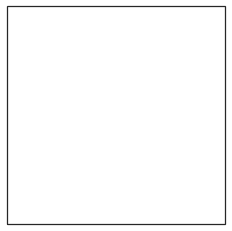

In [75]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([59.9, 100.1, 0, 40.1], crs=ccrs.PlateCarree())
ds_comb.t2m.isel(time=0).plot.contourf(ax = ax, cmap='turbo', extend='neither', levels=15)
ax.coastlines()
gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.1, linestyle='--')
gridliner.top_labels = False
gridliner.right_labels = False
gridliner.ylines = False  # you need false
gridliner.xlines = False  # you need false